In [1]:
from pyagamo.objectives import RE36
from pyagamo.players import ClonalSelection
from pyagamo import AGAMO
import time
import matplotlib.pyplot as plt

In [2]:
max_eval = 10000
npop = 25
change_iter = 1
next_iter = -1
max_front = 100
player_parm = { "nclone": 15, "mutate_args": [0.45, 0.9, 0.01], 'sup': 0.0}

In [3]:
objs = [RE36(i, obj=i+1) for i in range(3)]
players = [ClonalSelection(i, npop, player_parm) for i in range(3)]

In [4]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

In [5]:
agamo.start_optimize()
res=agamo.get_results()
agamo.close()

10011.0eval [00:13, 761.78eval/s]                         


In [6]:
res

{'stop_flag': True,
 'front': array([[13.23081905, 15.35458524, 51.99591699, 25.52668862],
        [16.3220591 , 17.48972888, 45.6649728 , 41.37719608],
        [12.11564491, 12.12634821, 26.73305563, 37.06133092],
        [13.23081905, 12.41371592, 30.67248605, 34.8011847 ],
        [12.11564491, 12.12634821, 31.49550474, 31.53183623],
        [12.21929729, 12.22985794, 30.67248605, 30.68758667],
        [12.11564491, 12.48437744, 30.56329053, 30.18368506],
        [12.        , 12.48437744, 29.63914354, 29.51317242],
        [12.11564491, 12.        , 28.68592113, 29.51317242],
        [12.21929729, 12.        , 28.68592113, 28.65058394],
        [12.21929729, 12.        , 26.73305563, 28.65058394],
        [12.11564491, 12.        , 26.73305563, 28.27858862],
        [12.11564491, 12.12634821, 26.73305563, 26.68262951],
        [12.21929729, 12.12634821, 25.8112577 , 25.65388644],
        [12.21929729, 12.        , 24.82358666, 25.50935624],
        [12.11564491, 12.22318825, 24.823

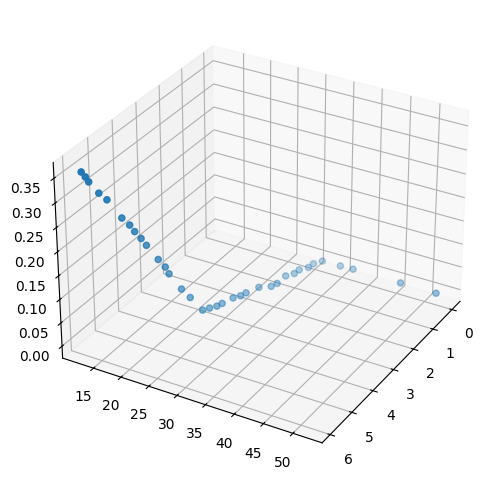

In [7]:
ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
front_eval = res['front_eval']
ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=str(max_eval))
ax.grid(True)
ax.view_init(30, 30)
plt.legend()
plt.show()

In [15]:
agamo = AGAMO(max_eval, change_iter, next_iter, max_front)
agamo.add_objectives(objs)
agamo.add_players(players)
agamo.init()

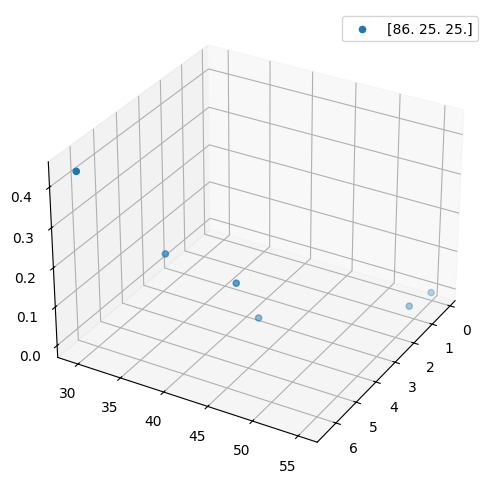

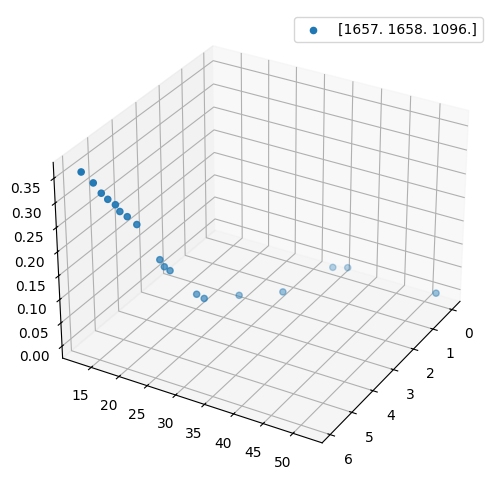

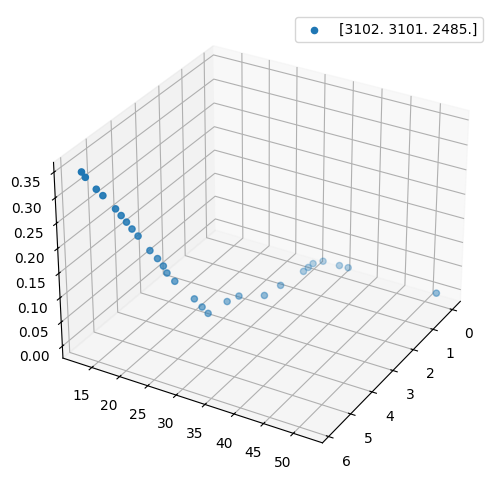

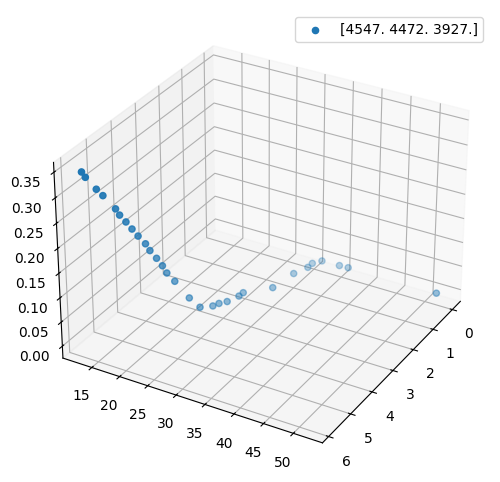

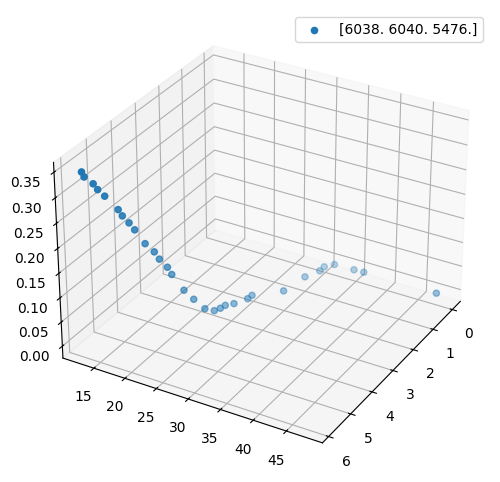

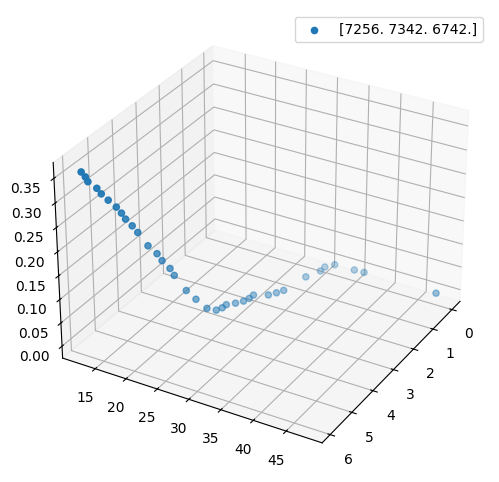

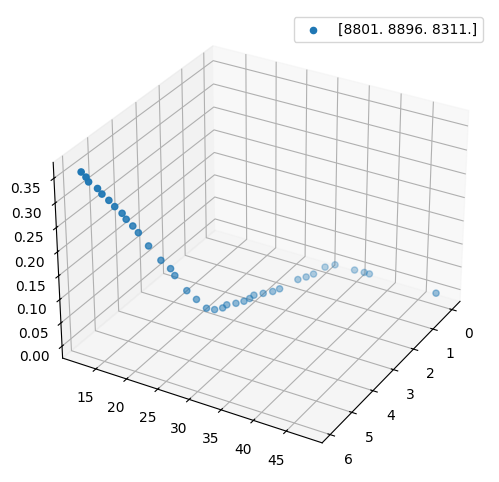

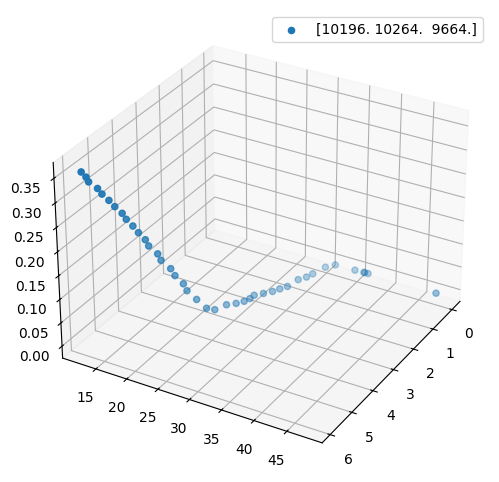

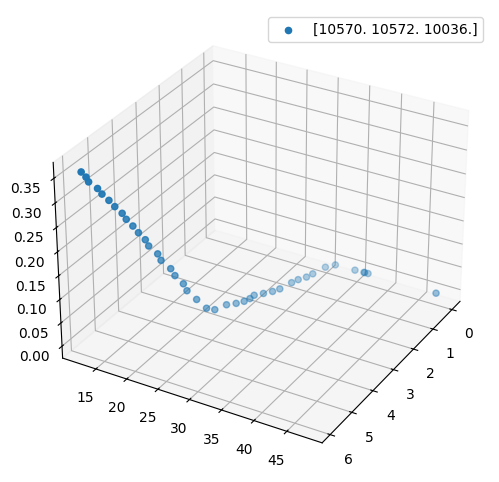

In [16]:
agamo.start_optimize(thread=True)
res=agamo.get_results()
while not res.get('stop_flag', False):
    res=agamo.get_results()
    front_eval = res.get('front_eval', None)
    if (front_eval is not None) and len(front_eval)>0:
        ax = plt.figure('Front Pareto', figsize=(6, 6)).add_subplot(111, projection='3d')
        ax.grid(True)
        ax.view_init(30, 30)
        ax.scatter(front_eval[:, 0], front_eval[:, 1], front_eval[:, 2], marker='o', label=res['evaluations']+res['evaluations_m'])
        plt.legend()
        plt.show()
    time.sleep(1)
    #print(res.get('iterations', 'brak'))
agamo.close()

In [12]:
res

{'stop_flag': True,
 'front': array([[13.36978757, 12.46824314, 46.63461383, 22.52507512],
        [12.07073424, 12.36435071, 36.8575968 , 26.80125841],
        [12.48153969, 12.17285037, 31.5146081 , 31.42431809],
        [12.41785335, 12.46824314, 31.02171894, 30.77387887],
        [12.36160291, 12.46824314, 30.27482547, 30.77387887],
        [12.08941487, 12.        , 29.47101123, 30.16034691],
        [12.36160291, 12.36435071, 29.47101123, 29.1199531 ],
        [12.20564672, 12.36435071, 27.57317405, 27.62912307],
        [12.36160291, 12.        , 27.53129067, 26.80125841],
        [12.48153969, 12.36435071, 26.85553179, 26.80125841],
        [12.36160291, 12.        , 25.73411742, 26.80125841],
        [12.20564672, 12.        , 25.51508879, 25.70261659],
        [12.48153969, 12.        , 25.51508879, 24.60215229],
        [12.48153969, 12.        , 24.9994773 , 24.60215229],
        [12.48153969, 12.46824314, 23.51612949, 24.60215229],
        [12.08941487, 12.46824314, 23.516